![picture](https://drive.google.com/uc?id=1ocBRtJXWTTKQTuP7bkAKdVpvpolHLSIS)

# **Importing Dependencies**

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# **Data collection and EDA**

In [177]:
# loading the dataset to pandas DataFrame

loan_df = pd.read_csv('/content/drive/MyDrive/ML Projects Workflow/loan_data.csv')

In [178]:
# number of rows & columns
loan_df.shape

(614, 13)

In [179]:
# names of the columns
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [180]:
# Checking the basic information
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [181]:
# check the basic descriptive statistics for numerical features
loan_df.describe(include=['int64','float64'])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [182]:
# check the basic descriptive statistics for categorical features
loan_df.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [183]:
# top 5 rows
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [184]:
# Check the number of unique values for every features
loan_df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [185]:
# Check for the number of missing values
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [186]:
# Check for the total number of data points for each features.
loan_df.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

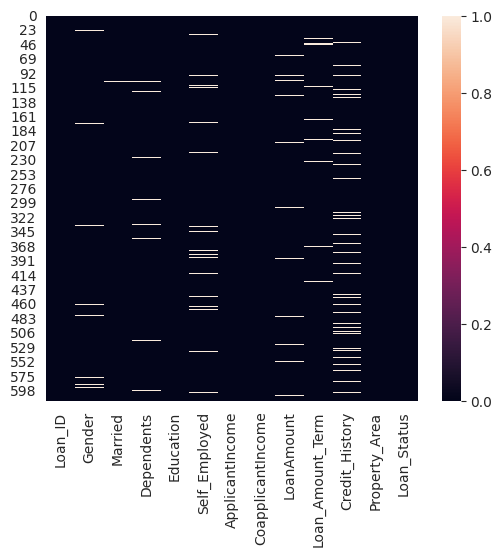

In [187]:
# Plot heatmap to see the null values
plt.figure(figsize=(6,5))
sns.heatmap(data=loan_df.isnull())
plt.show()

In [188]:
# Calculating how much percent of data is missing out
missing_prct = round((loan_df.isnull().sum()/loan_df.count())*100,2)
missing_prct

Loan_ID              0.00
Gender               2.16
Married              0.49
Dependents           2.50
Education            0.00
Self_Employed        5.50
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.72
Loan_Amount_Term     2.33
Credit_History       8.87
Property_Area        0.00
Loan_Status          0.00
dtype: float64

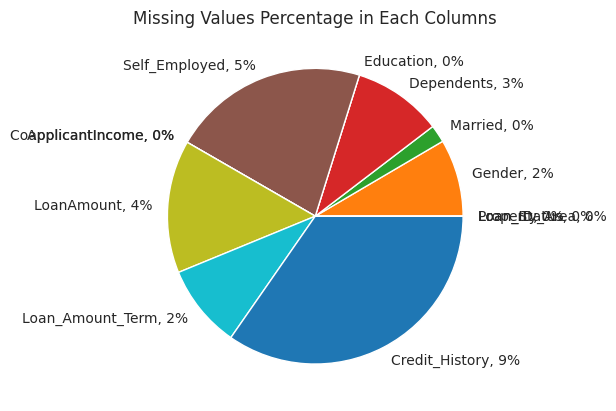

In [189]:
missing_prct = (loan_df.isnull().sum() / loan_df.count()) * 100
labels = loan_df.columns
plt.title("Missing Values Percentage in Each Columns")

# Add percentage values
plt.percents = [f"{value:.0f}%" for value in missing_prct]
labels = [f"{label}, {pct}" for label, pct in zip(labels, plt.percents)]

plt.pie(missing_prct, labels=labels)
plt.show()

# **Dropping the missing values**

In [190]:
loan_df = loan_df.dropna()

In [191]:
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [192]:
# Check the duplicated values
loan_df.duplicated().sum()

0

In [193]:
# Check the Imbalanced Target Feature for training.
loan_df['Loan_Status'].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

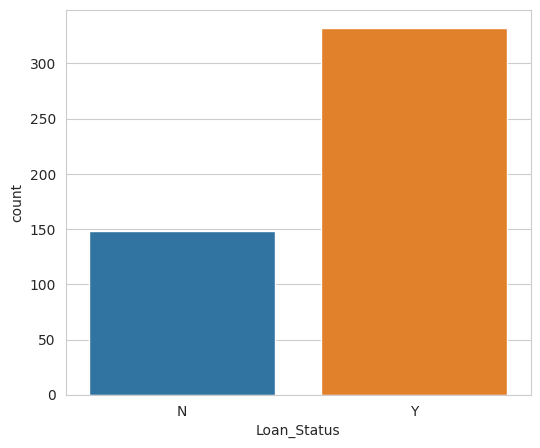

In [194]:
# Plot Count plot to see the imbalance nature of the target feature.
plt.figure(figsize=(6,5))
sns.countplot(data=loan_df, x='Loan_Status', hue="Loan_Status")
plt.show()

In [195]:
loan_df.groupby('Loan_Status').mean()

<ipython-input-195-f1af38e2c624>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loan_df.groupby('Loan_Status').mean()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5730.189189,1773.081081,153.378378,342.810811,0.574324
Y,5201.093373,1495.508795,140.882530,341.710843,0.978916


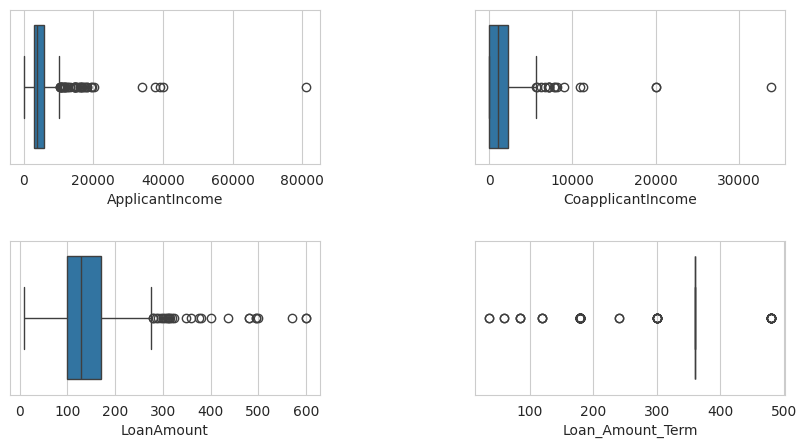

In [196]:
# Create Box-Plot to check for Outliers in numerical features.
plt.figure(figsize=(10,8))
for i,col in enumerate(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']):
  plt.subplot(3,2,i+1)
  sns.boxplot(x=col, data=loan_df)

plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()

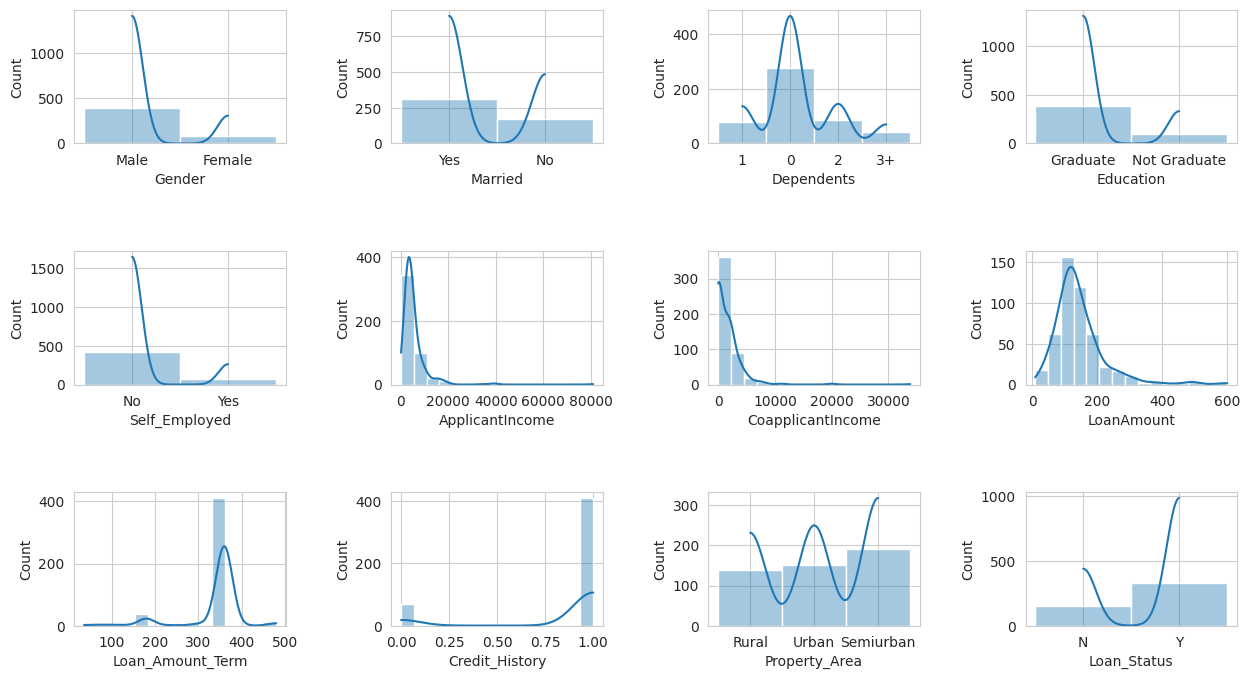

In [197]:
# Create the Hist Plot to check the distribution of data points for each features.

plt.figure(figsize=(15,8))
for i,col in enumerate(['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']):
  plt.subplot(3,4,i+1)
  sns.histplot(x=col, data=loan_df, kde=True,alpha=0.4, bins=15)

plt.subplots_adjust(wspace=0.5,hspace=0.8)
plt.show()


# **Encoding of Categorical Columns**

In [198]:
# label encoding
loan_df.replace({'Loan_Status':{'N':0, 'Y':1}}, inplace=True)

In [199]:
loan_df['Loan_Status']

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [200]:
# Dependent Column Values
loan_df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [201]:
# Replacing the values of 3+ to 4
loan_df = loan_df.replace(to_replace='3+', value=4)

In [202]:
loan_df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

<Figure size 1000x800 with 0 Axes>

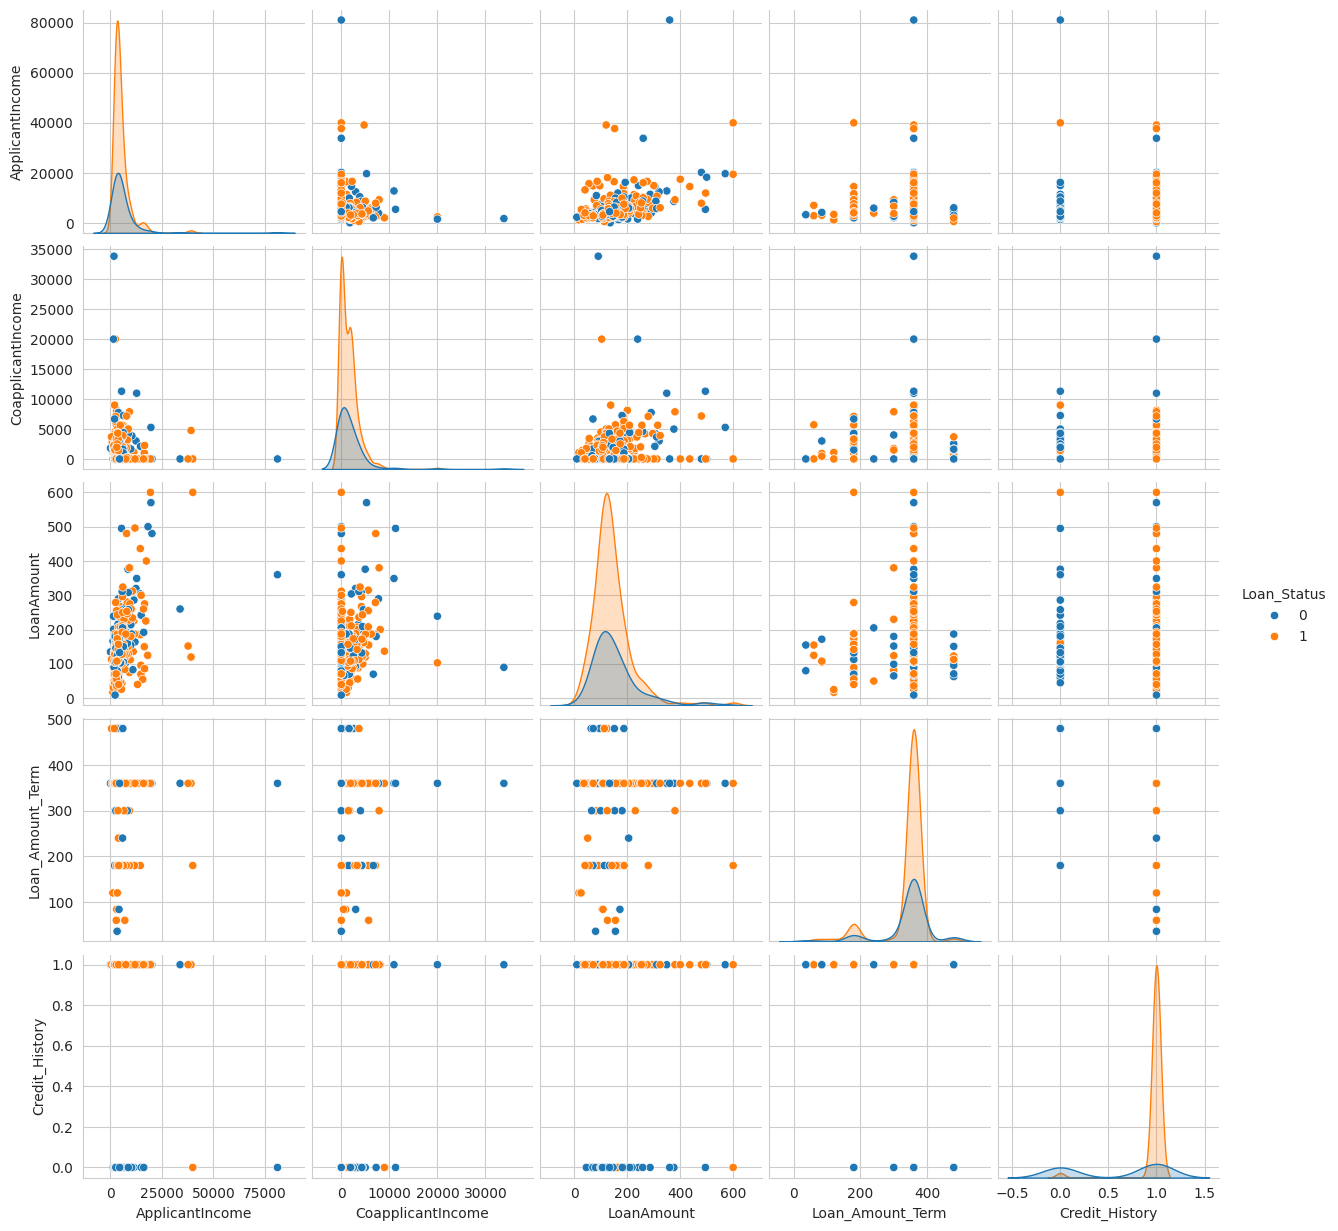

In [203]:
# Create the Pair Plot to check the relationship between other features.

plt.figure(figsize=(10,8))
vars = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
sns.pairplot(data=loan_df, vars=vars, hue='Loan_Status', kind='scatter', diag_kind= 'kde', dropna=True)
plt.show()

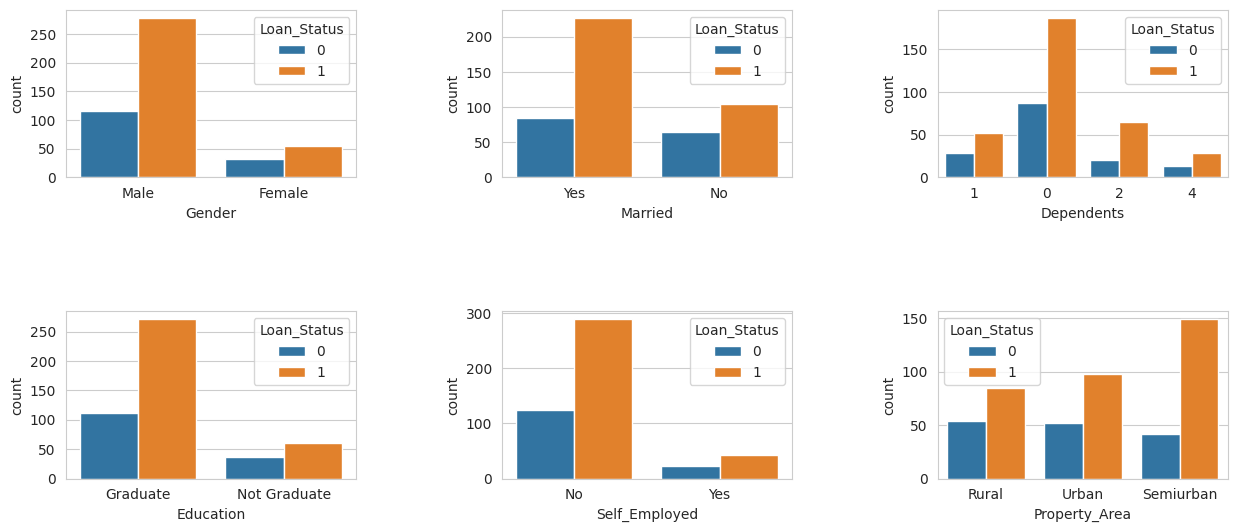

In [204]:
# Create the Count Plot to check the frequency of data points for each features.

plt.figure(figsize=(15,10))
for i,col in enumerate(['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area']):
  plt.subplot(3,3,i+1)
  sns.countplot(x=col, hue='Loan_Status', data=loan_df)

plt.subplots_adjust(wspace=0.5,hspace=0.8)
plt.show()


In [205]:
# Convert thte categorical columns to numerical values
# label encoding
loan_df.replace({'Married':{'No':0, 'Yes':1}, 'Self_Employed':{'No':0, 'Yes':1}, 'Gender':{'Female':0, 'Male':1},
                 'Education':{'Not Graduate':0, 'Graduate':1},'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2}}, inplace=True)


In [206]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


<ipython-input-207-559b6f195999>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=loan_df.corr(),fmt='.2f', annot=True, cmap='RdBu_r', square=True, center=True, vmin=-1, vmax=1)


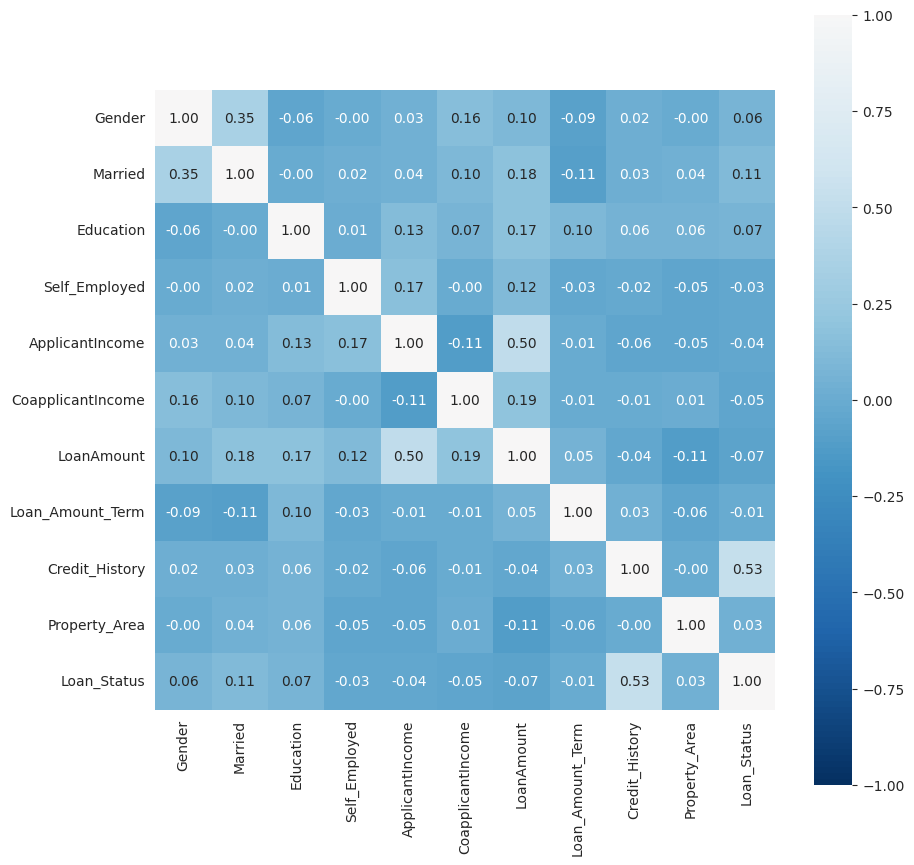

In [207]:
# Create the heatmap with correlation to check multicolinearity between the features.
plt.figure(figsize=(10,10))
sns.heatmap(data=loan_df.corr(),fmt='.2f', annot=True, cmap='RdBu_r', square=True, center=True, vmin=-1, vmax=1)
plt.show()

# **Separate the Data and Label:**

In [208]:
X = loan_df.drop(columns=['Loan_Status','Loan_ID'], axis=1)
y = loan_df['Loan_Status']

# **Train Test Split**

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=2)

In [210]:
print(X.shape, X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


# **Training Model : SVM**

In [211]:
from sklearn.svm import SVC

In [212]:
classifier = SVC(kernel='linear')

In [213]:
# Training the model on training data:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

# **Model Evaluation**

# 5.**Accuracy Score**

In [217]:
# accuracy on the train data
X_train_pred = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, y_train)

In [218]:
print('Accuracy on training data: {}%'.format(round((training_data_accuracy*100),2)))

Accuracy on training data: 79.86%


In [219]:
# accuracy on the test data
X_test_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, y_test)

In [220]:
print('Accuracy on test data: {}%'.format(round((test_data_accuracy*100),2)))

Accuracy on test data: 83.33%


# **Classification Metrics:**

# 1.**Log Loss**

In [226]:
from sklearn.metrics import log_loss
ll_model1 = log_loss(X_test_pred, y_test)
print("Log Loss for Model_1: {}".format(round(ll_model1,2)))

Log Loss for Model_1: 6.01


# 2.**Classification Report**


In [227]:
from sklearn.metrics import classification_report
cr_model1 = classification_report(X_test_pred, y_test)
print(cr_model1)

              precision    recall  f1-score   support

           0       0.60      0.82      0.69        11
           1       0.94      0.84      0.89        37

    accuracy                           0.83        48
   macro avg       0.77      0.83      0.79        48
weighted avg       0.86      0.83      0.84        48



# 3.**Confusion Matrix**

In [228]:
from sklearn.metrics import confusion_matrix
cm_model1 = confusion_matrix(X_test_pred, y_test)
print(cm_model1)

[[ 9  2]
 [ 6 31]]


# 4.**Area Under ROC**

In [233]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr_model1, tpr_model1, threshold_model1 = roc_curve(y_test, X_test_pred)
print('roc_auc_score_model1: ',roc_auc_score(y_test, X_test_pred))


roc_auc_score_model1:  0.7696969696969697


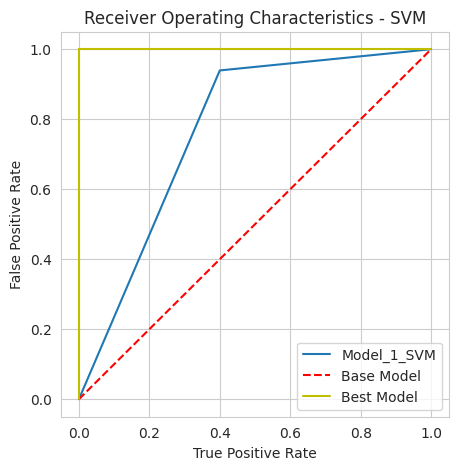

In [234]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristics - SVM')
plt.plot(fpr_model1, tpr_model1, label="Model_1_SVM")
plt.plot([0,1],ls="--",c='red', label="Base Model")
plt.plot([1,1],c='y'),plt.plot([0,0],[1,0],c='y',label='Best Model')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()